# GA Capstone - Sortify

##### Aziz Maredia | DSIR-1019 | 01.27.21

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_extraction.text import CountVectorizer

pd.options.mode.chained_assignment = None

pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 

In [45]:
tracks = pd.read_csv('.././datasets/combined_tracks.csv')

In [46]:
tracks.shape

(1542, 51)

In [47]:
tracks = tracks.loc[tracks['data_type'] == 'user_library', :]

In [48]:
tracks_corr = tracks[['danceability', 'energy', 'loudness', 'speechiness', 
               'acousticness', 'instrumentalness', 'liveness', 
               'valence', 'tempo', 'mode']].corr()

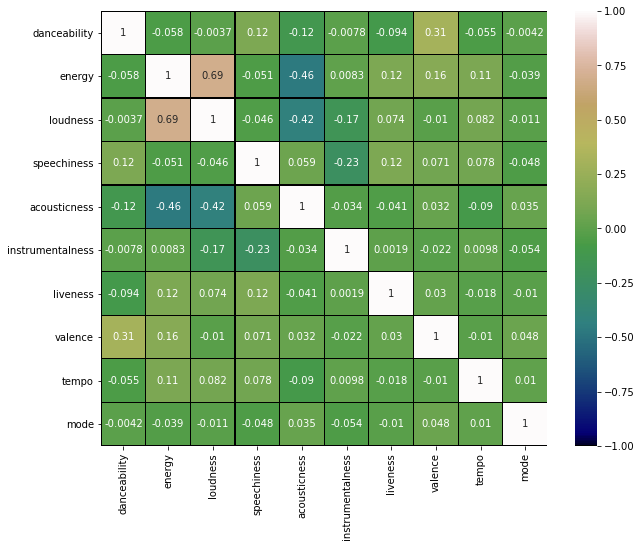

In [49]:
plt.figure(figsize = (10,8))

sns.heatmap(tracks_corr, vmin = -1, vmax = 1, cmap = "gist_earth", annot = True, linewidths = 0.05, linecolor = 'black');

### Most Common Artists

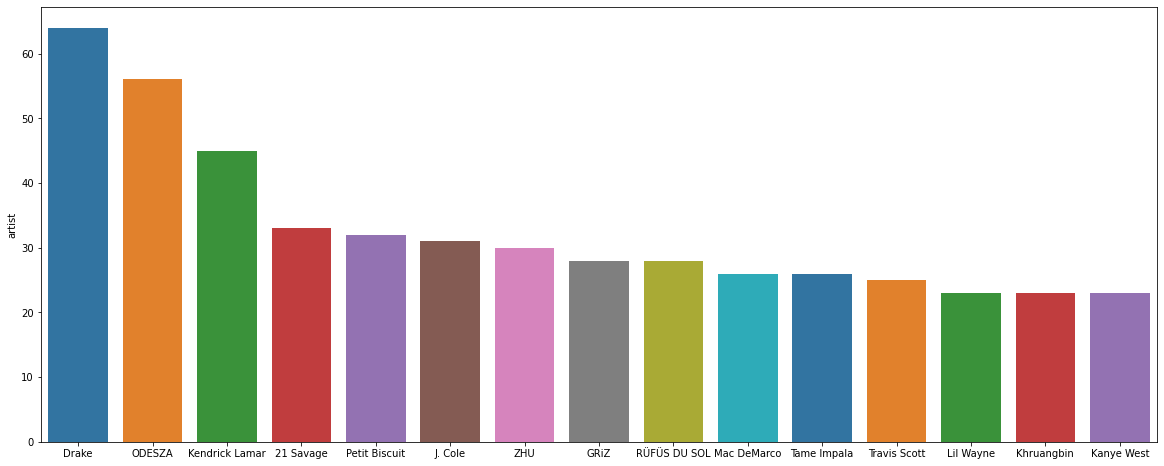

In [50]:
plt.figure(figsize = (20,8))

sns.barplot(x = tracks['artist'].value_counts()[:15].index,
            y = tracks['artist'].value_counts()[:15],
            palette = 'tab10');

### Artist and Song Popularity

In [55]:
# average artist and song popularity of songs in my library

tracks[['popularity_artist', 'popularity_song']].mean()

popularity_artist    73.620735
popularity_song      40.541339
dtype: float64

In [56]:
# median artist and song popularity of songs in my library

tracks[['popularity_artist', 'popularity_song']].median()

popularity_artist    73.0
popularity_song      47.0
dtype: float64

In [57]:
# 25 most popular artists in my library

tracks[['artist', 'popularity_artist']].groupby('artist').mean().sort_values(by = 'popularity_artist', ascending = False)[:25]

,popularity_artist
artist,
Drake,97
The Weeknd,96
Justin Bieber,96
Dua Lipa,94
Eminem,94
DaBaby,94
Travis Scott,94
Lil Baby,93
Post Malone,93


In [58]:
# 25 most popular tracks in my library

tracks[['track', 'artist', 'popularity_song']].sort_values(by = 'popularity_song', ascending = False)[:25]

,track,artist,popularity_song
120,The Box,Roddy Ricch,88.0
141,HIGHEST IN THE ROOM,Travis Scott,87.0
694,goosebumps,Travis Scott,87.0
525,SICKO MODE,Travis Scott,86.0
31,ROXANNE,Arizona Zervas,86.0
1270,All of Me,John Legend,85.0
416,Yellow,Coldplay,85.0
61,"WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil W...",Jack Harlow,85.0
623,The Less I Know The Better,Tame Impala,84.0
98,Life Is Good (feat. Drake),Future,84.0


### Release Date

In [59]:
tracks['release_date'] = [int(i[:4]) for i in tracks['release_date']]

new_dates = []
    
for date in tracks['release_date']:
    if date < 1950:
        new_dates.append('Pre_50s')
    elif date >= 1950 and date < 1960:
        new_dates.append('50s')
    elif date >= 1960 and date < 1970:
        new_dates.append('60s')
    elif date >= 1970 and date < 1980:
        new_dates.append('70s')
    elif date >= 1980 and date < 1990:
        new_dates.append('80s')
    elif date >= 1990 and date < 2000:
        new_dates.append('90s')
    elif date >= 2000 and date < 2010:
        new_dates.append('2000s')
    elif date >= 2010:
        new_dates.append('Post_2010s')
    else:
        new_dates.append('Date not available')
        
tracks['release_date'] = new_dates

In [61]:
# breakdown of songs by release date

pd.DataFrame(tracks['release_date'].value_counts())

,release_date
Post_2010s,1394
2000s,86
70s,14
90s,13
80s,12
60s,5


### Audio Analysis

In [63]:
tracks['loudness'] = (tracks['loudness'] / 60) * -1

tracks_audio = pd.melt(tracks, value_vars=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'])

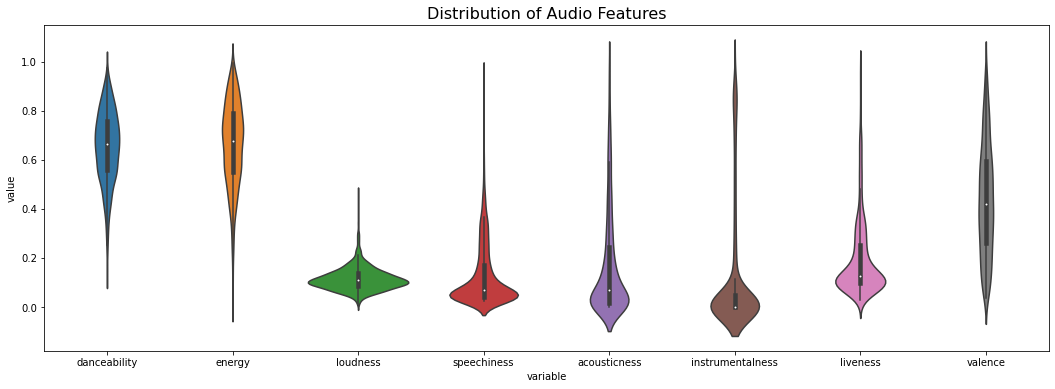

In [68]:
plt.figure(figsize=(18,6))

sns.violinplot(x = tracks_audio['variable'], y = tracks_audio['value']);

plt.title('Distribution of Audio Features', fontsize = 16);

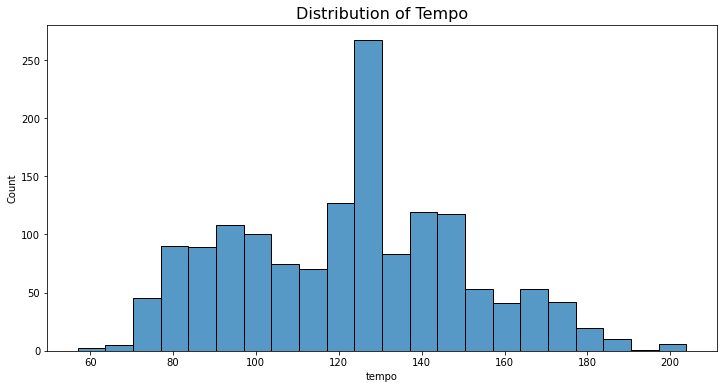

In [69]:
plt.figure(figsize=(12,6))

sns.histplot(tracks['tempo']);

plt.title('Distribution of Tempo', fontsize = 16);

In [17]:
key_map = {0:'C', 1:'C♯', 2:'D', 3:'D♯', 4:'E', 5:'F', 6:'F♯', 7:'G', 8:'G♯', 9:'A', 10:'A♯', 11:'B'}
tracks['key'] = tracks['key'].map(key_map)

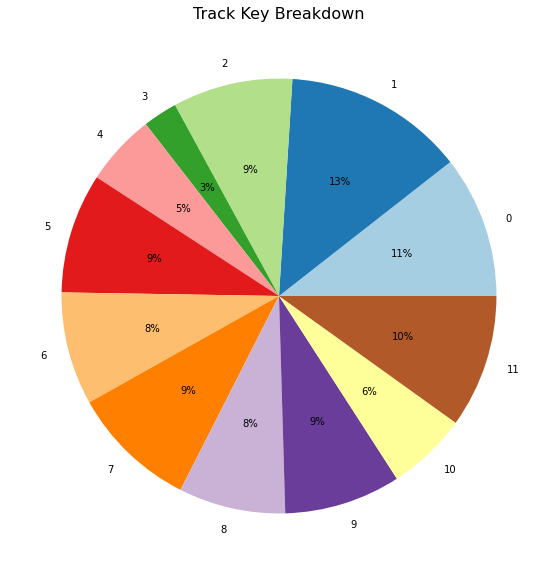

In [70]:
plt.figure(figsize = (10,10))

cmap = plt.get_cmap("Paired")

plt.pie(x = tracks['key'].value_counts().sort_index(),
        labels = tracks['key'].value_counts().sort_index().index, 
        colors = cmap(np.arange(12)), 
        normalize = True,
        autopct = '%.0f%%');

plt.title('Track Key Breakdown', fontsize = 16);

In [71]:
# breakdown of time_signature of songs in my library 

pd.DataFrame(tracks['time_signature'].value_counts())

,time_signature
4,1450
3,42
5,27
1,5


In [72]:
# breakdown of mode of songs in my library

pd.DataFrame(tracks['mode'].value_counts())

,mode
1,886
0,638


### Genres

In [73]:
tracks.columns

Index(['track', 'artist', 'track_id', 'data_type', 'popularity_artist',
       'popularity_song', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'mode', 'key', 'time_signature', 'release_date', 'alternative',
       'baltic_slavic', 'bluegrass', 'blues', 'celtic', 'country', 'dance',
       'disco', 'edm', 'electro', 'english', 'folk', 'germanic', 'hip hop',
       'house', 'jam band', 'jazz', 'other', 'piano', 'pop', 'psychedelic',
       'punk', 'r&b', 'rap', 'reggae', 'rock', 'romance', 'soul',
       'south_american', 'swing', 'techno', 'trance'],
      dtype='object')

In [78]:
top_genres = pd.DataFrame(tracks[['alternative',
       'baltic_slavic', 'bluegrass', 'blues', 'celtic', 'country', 'dance',
       'disco', 'edm', 'electro', 'english', 'folk', 'germanic', 'hip hop',
       'house', 'jam band', 'jazz', 'other', 'piano', 'pop', 'psychedelic',
       'punk', 'r&b', 'rap', 'reggae', 'rock', 'romance', 'soul',
       'south_american', 'swing', 'techno', 'trance']].sum().sort_values(ascending = False)[:10])

In [82]:
top_genres

,0
pop,773
rap,612
hip hop,470
edm,431
electro,431
house,373
dance,267
english,204
rock,144
soul,115


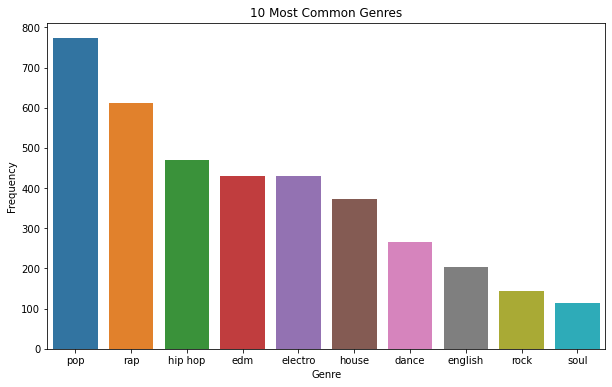

In [88]:
plt.figure(figsize = (10, 6))

sns.barplot(x = top_genres.index,
            y = top_genres[0],
            palette = 'tab10');

plt.title('10 Most Common Genres')
plt.ylabel('Frequency')
plt.xlabel('Genre');